In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
# from scipy.fft import fft, ifft, fftshift
from scipy.signal.windows import hann, flattop

In [14]:
f1 = 300  # Hz
f2 = 300.25  # Hz
f3 = 299.75 # Hz
fs = 400  # Hz
N = 2000
k = np.arange(N)
x1 = 2 * np.sin(2 * np.pi * f1 / fs * k)
x2 = 2 * np.sin(2 * np.pi * f2 / fs * k)
x3 = 2 * np.sin(2 * np.pi * f3 / fs * k)

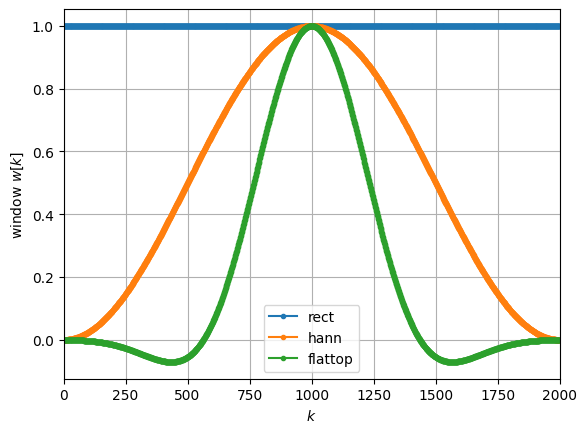

In [15]:
wrect = np.ones(N)
whann = hann(N, sym=False)
wflattop = flattop(N, sym=False)
plt.plot(wrect, 'C0o-', ms=3, label='rect')
plt.plot(whann, 'C1o-', ms=3, label='hann')
plt.plot(wflattop, 'C2o-', ms=3, label='flattop')
plt.xlabel(r'$k$')
plt.ylabel(r'window $w[k]$')
plt.xlim(0, N)
plt.legend()
plt.grid(True)

In [16]:
X1wrect = fft(x1)
X2wrect = fft(x2)
X3wrect = fft(x3)
X1whann = fft(x1 * whann)
X2whann = fft(x2 * whann)
X3whann = fft(x3 * whann)
X1wflattop = fft(x1 * wflattop)
X2wflattop = fft(x2 * wflattop)
X3wflattop = fft(x3 * wflattop)

In [17]:
# This handling is working for N even and odd:
def fft2db(X):
    N = X.size
    Xtmp = 2 / N * X  # Independent of N, norm for sine amplitudes
    Xtmp[0] *= 1 / 2  # Bin for f=0 Hz is existing only once,
    # so cancel *2 from above
    if N % 2 == 0:  # fs/2 is included as a bin
        # fs/2 bin is existing only once, so cancel *2 from above
        Xtmp[N // 2] = Xtmp[N // 2] / 2
    return 20 * np.log10(np.abs(Xtmp))  # in dB
# Setup of frequency vector this way is independent of N even/odd:
df = fs / N
f = np.arange(N) * df

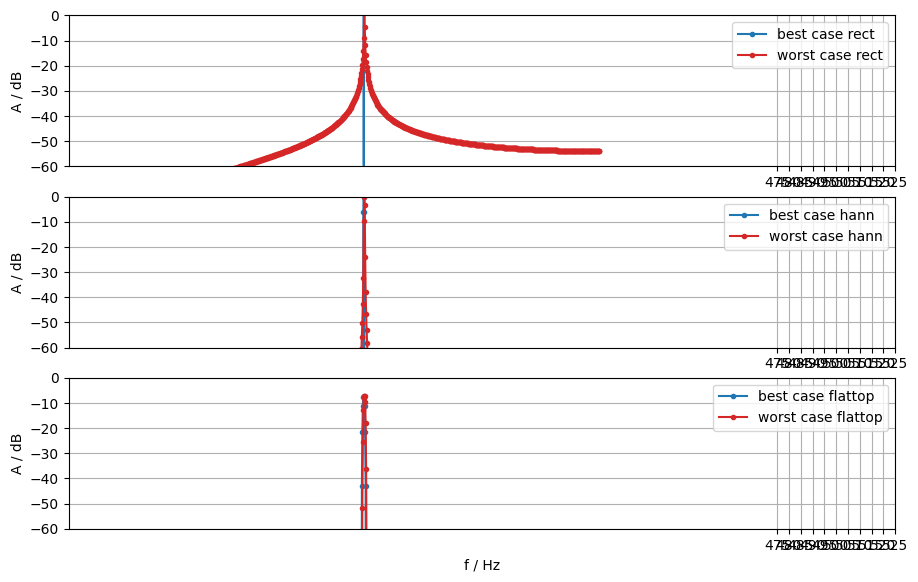

In [18]:
plt.figure(figsize=(16 / 1.5, 10 / 1.5))

plt.subplot(3, 1, 1)
plt.plot(f, fft2db(X1wrect), 'C0o-', ms=3, label='best case rect')
plt.plot(f, fft2db(X2wrect), 'C3o-', ms=3, label='worst case rect')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(475, 530, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
# plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(f, fft2db(X1whann), 'C0o-', ms=3, label='best case hann')
plt.plot(f, fft2db(X2whann), 'C3o-', ms=3, label='worst case hann')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(475, 530, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
# plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(f, fft2db(X1wflattop), 'C0o-', ms=3, label='best case flattop')
plt.plot(f, fft2db(X2wflattop), 'C3o-', ms=3, label='worst case flattop')
plt.xlim(175, 225)
plt.ylim(-60, 0)
plt.xticks(np.arange(475, 530, 5))
plt.yticks(np.arange(-60, 10, 10))
plt.legend()
plt.xlabel('f / Hz')
plt.ylabel('A / dB')
plt.grid(True)

C:\Users\mrbre\AppData\Local\Temp\ipykernel_11776\1233691371.py:9: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W)  # Get level in dB


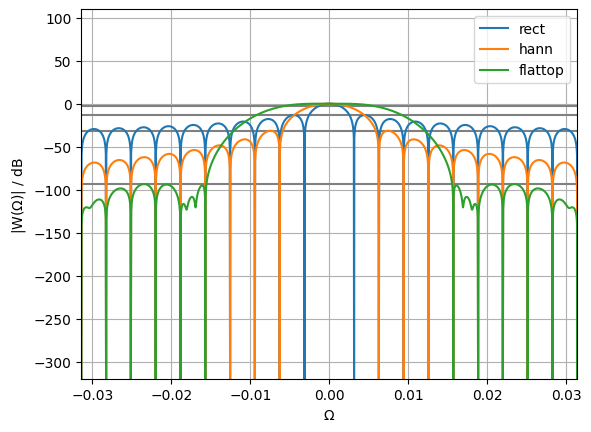

In [19]:
def winDTFTdB(w):
    N = w.size  # Get window length
    Nz = 100 * N  # Zero-padding length
    W = np.zeros(Nz)  # Allocate RAM
    W[0:N] = w  # Insert window
    W = np.abs(fftshift(fft(W)))  # FFT, fftshift, and magnitude
    W /= 1.5  # Divide by 1.5
    W /= np.max(W)  # Normalize to maximum, i.e., the mainlobe
    W = 20 * np.log10(W)  # Get level in dB
    # Get appropriate digital frequencies
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi  # Also shifted
    return Omega, W



plt.plot([-np.pi, +np.pi], [-3.01, -3.01], 'gray')  # Mainlobe bandwidth
plt.plot([-np.pi, +np.pi], [-13.3, -13.3], 'gray')  # Rect max sidelobe
plt.plot([-np.pi, +np.pi], [-31.5, -31.5], 'gray')  # Hann max sidelobe
plt.plot([-np.pi, +np.pi], [-93.6, -93.6], 'gray')  # Flattop max sidelobe


Omega, W = winDTFTdB(wrect)
plt.plot(Omega, W, label='rect')

Omega, W = winDTFTdB(whann)
plt.plot(Omega, W, label='hann')

Omega, W = winDTFTdB(wflattop)
plt.plot(Omega, W, label='flattop')

plt.xlim(-np.pi, np.pi)
plt.ylim(-320, 110)

# Zoom in to mainlobe
plt.xlim(-np.pi / 100, np.pi / 100)

plt.xlabel(r'$\Omega$')
plt.ylabel(r'|W($\Omega$)| / dB')
plt.legend()
plt.grid(True)